# Building a linear Regression model to predict the FWI (numeric number for the risk of ignition and spread)

The dataset is based on the forestfire data of Algeria region, to study the risk of forest fire based on the weather condition of the region

In [ ]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# importing the dataset and providing the proper structure
data=pd.read_csv("drive/MyDrive/Colab Notebooks/forest_fire.csv")
df=pd.DataFrame(data)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


# Unsdersting the dataset





Attribute Information:

1.Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2.Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

3.RH : Relative Humidity in %: 21 to 90

4.Ws :Wind speed in km/h: 6 to 29

5.Rain: total day in mm: 0 to 16.8

--->FWI Components

6.Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

7.Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

8.Drought Code (DC) index from the FWI system: 7 to 220.4

9.Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

10.Buildup Index (BUI) index from the FWI system: 1.1 to 68

11.Fire Weather Index (FWI) Index: 0 to 31.1

12.Classes: two classes, namely fire and not fire.

In [ ]:
# information regarding data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


Based on the info we will process the data like - nullvalues, object to numeric type data


In [ ]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [ ]:
# reomiving the null values
df.dropna(inplace=True)
df.head()
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
117,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
118,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
119,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
120,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
121,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [ ]:
# cross check
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [ ]:
# fix spaces in columns for better accesing in future
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [ ]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

# Changing the all data sets to numeric form

In [ ]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          121 non-null    int64  
 1   month        121 non-null    int64  
 2   year         121 non-null    int64  
 3   Temperature  121 non-null    int64  
 4   RH           121 non-null    int64  
 5   Ws           121 non-null    int64  
 6   Rain         121 non-null    float64
 7   FFMC         121 non-null    float64
 8   DMC          121 non-null    float64
 9   DC           121 non-null    object 
 10  ISI          121 non-null    float64
 11  BUI          121 non-null    float64
 12  FWI          121 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 14.2+ KB


In [ ]:
# converting other data type to float values
[features for features in df.columns if df[features].dtype=='object']


['DC', 'FWI', 'Classes']

Saving the cleaned dataset for further uses



In [ ]:
df.to_csv("forest_fire_cleaned.csv",index=False)

# Exploratry Data analysis


In [ ]:
# drop that features that are not much necessary
df_copy=df.drop(['day','month','year'],axis=1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [ ]:
df_copy['Classes'].value_counts()
# note that all strings are not same

,count
Classes,
fire,78
not fire,41
not fire,1
not fire,1


In [ ]:
# converting catagorical data to numeric type by encoding
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


In [ ]:
df_copy['Classes'].value_counts()

,count
Classes,
1,78
0,43


# visualistion of data

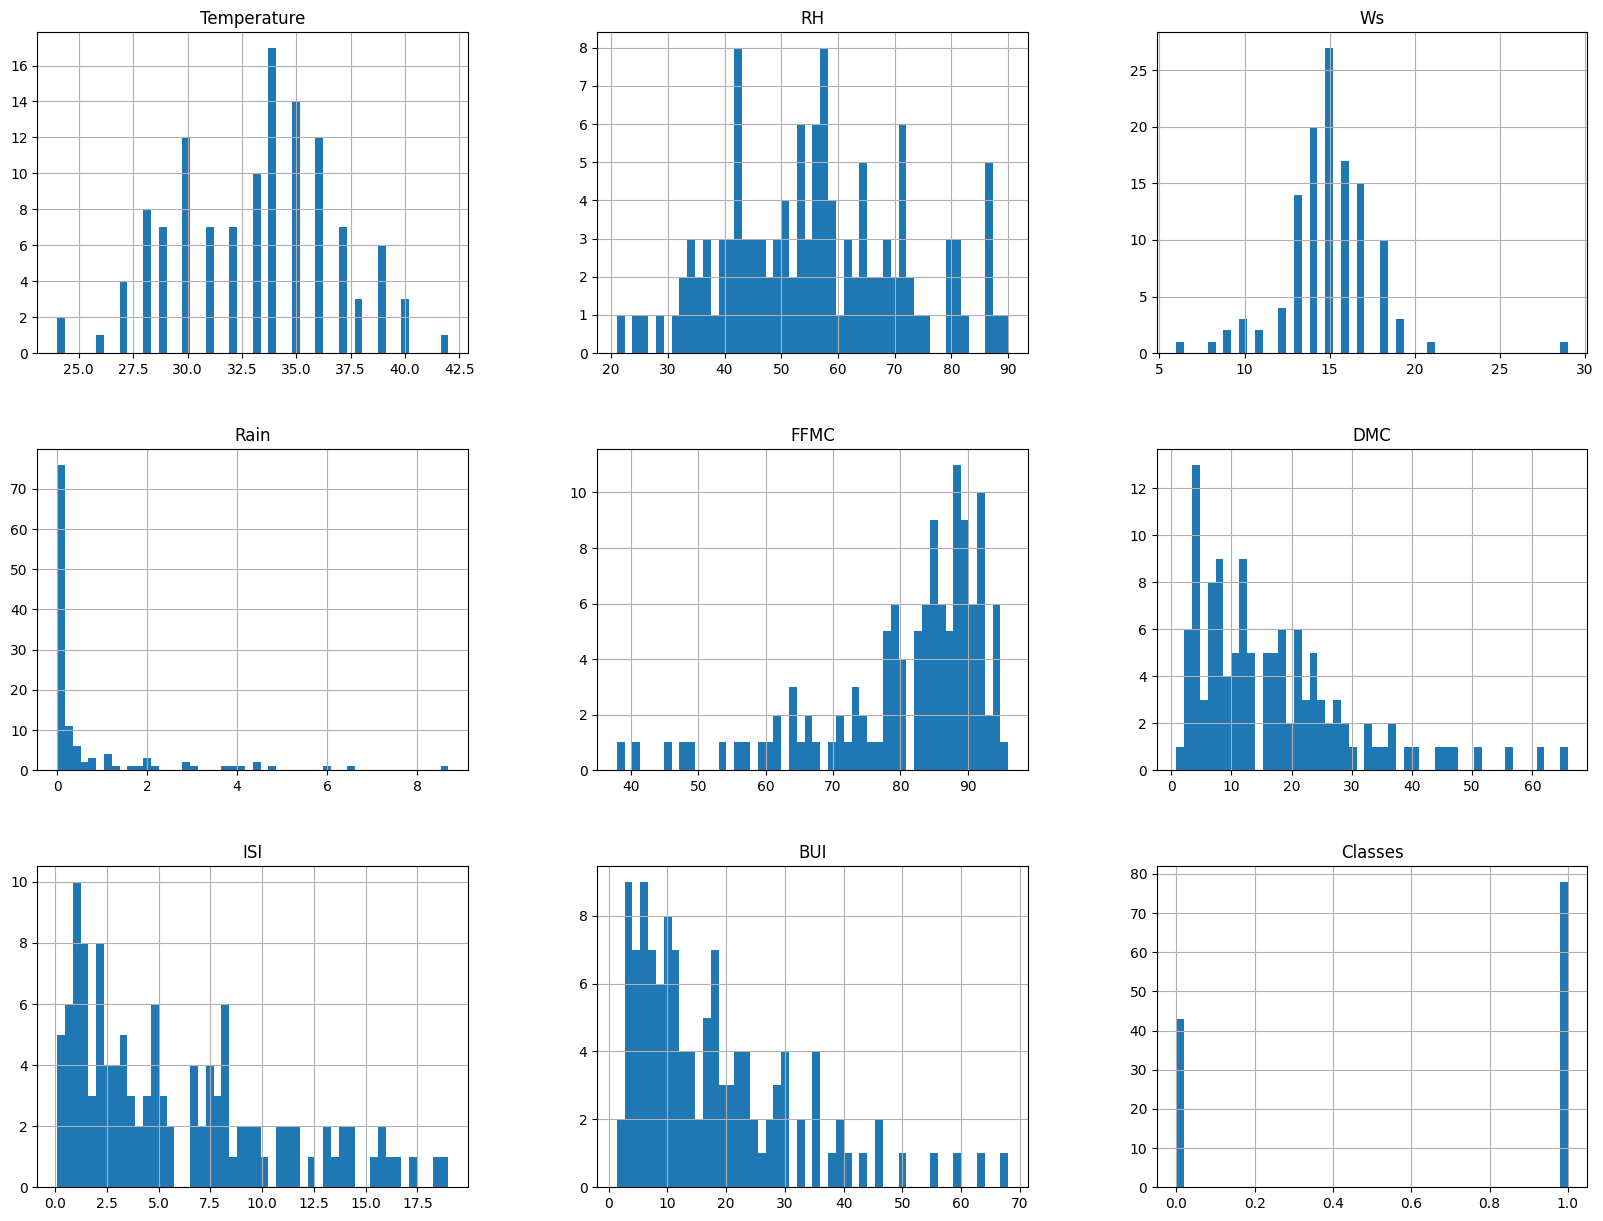

In [ ]:
# plot density plot for all features
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

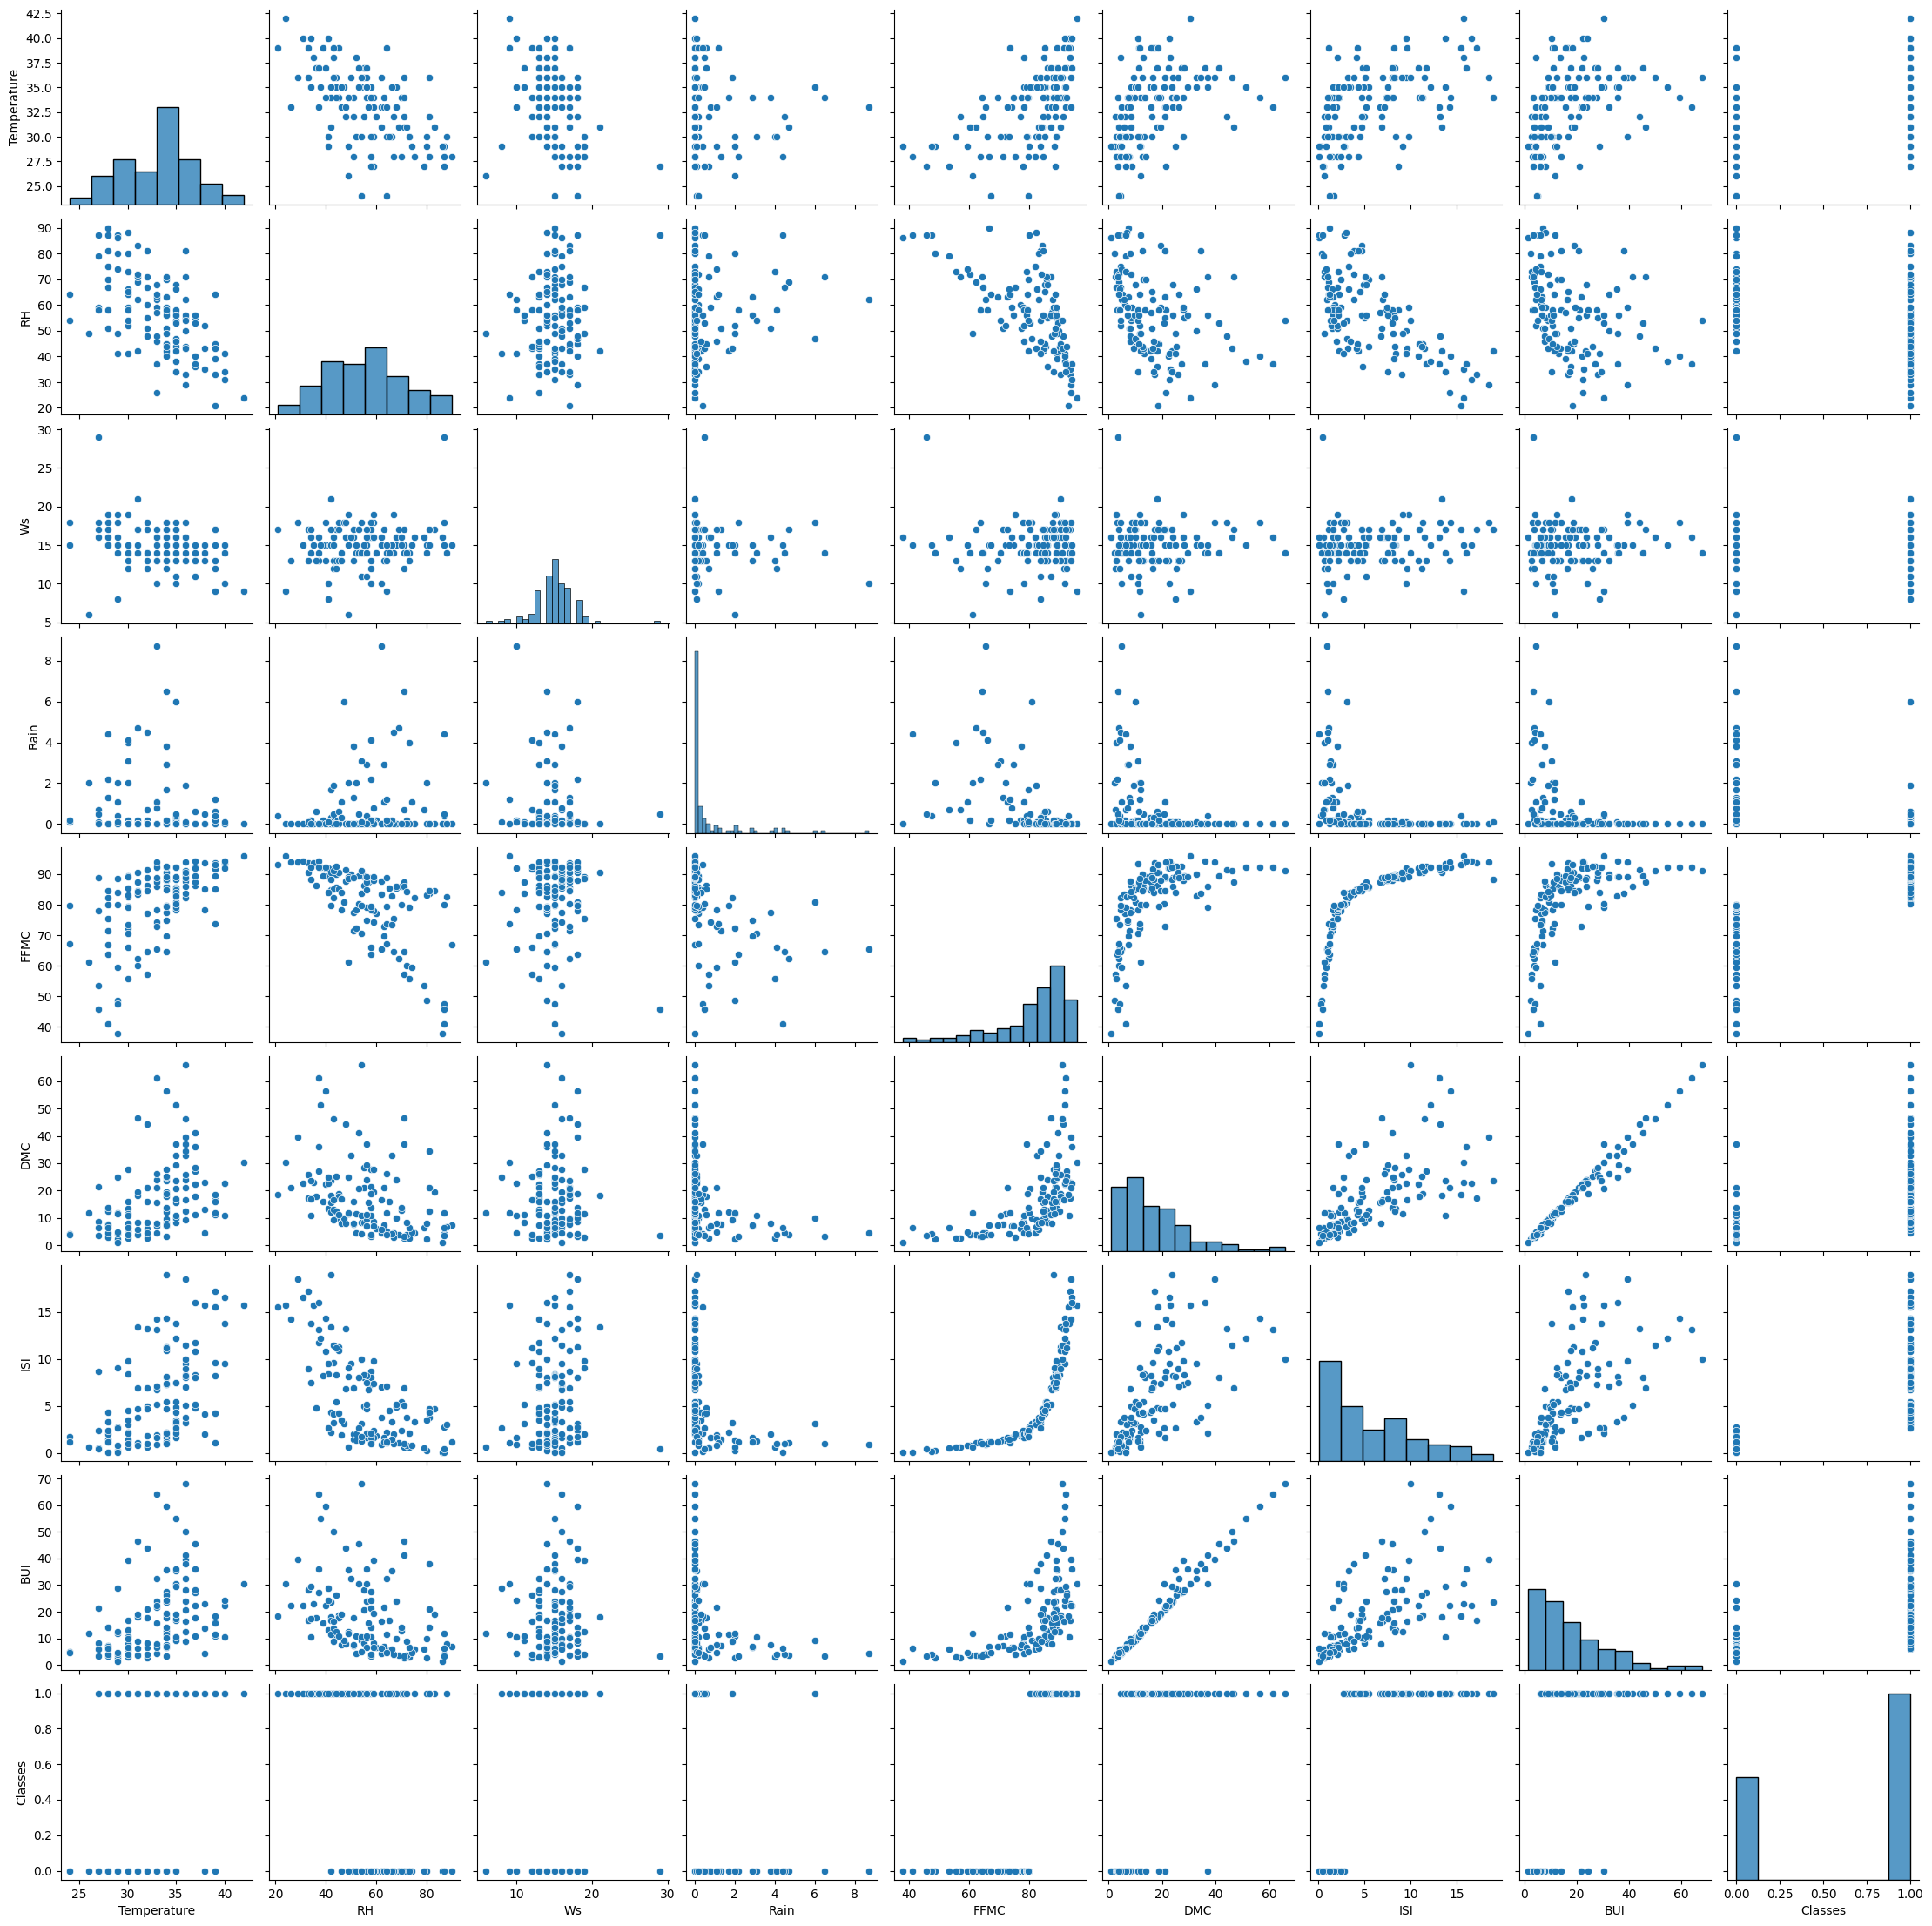

In [ ]:
sns.pairplot(df_copy)
plt.show()

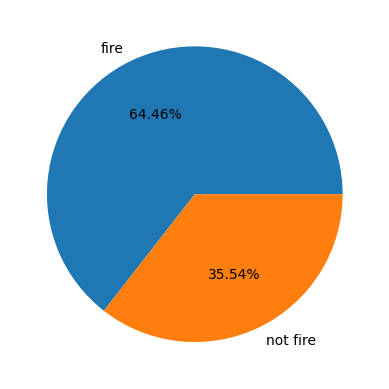

In [ ]:
# percentage for pie chart
df_copy['Classes'].value_counts(normalize=True)*100
# plotting pie chart
plt.pie(df_copy['Classes'].value_counts(),labels=['fire','not fire'],autopct='%1.2f%%')
plt.show()

In [ ]:
# checking for the correlation between the dependentant and independant features
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.594127,-0.270491,-0.127553,0.571143,0.394472,0.292707,0.535954,0.373088,0.500971,0.498754
RH,-0.594127,1.000000,0.154297,0.146750,-0.644134,-0.384730,-0.275144,-0.691191,-0.367170,-0.605856,-0.440500
Ws,-0.270491,0.154297,1.000000,-0.137527,-0.025478,0.031887,0.023962,0.128558,0.033553,0.106128,0.046994
Rain,-0.127553,0.146750,-0.137527,1.000000,-0.509872,-0.349583,-0.347646,-0.412636,-0.359493,-0.410213,-0.474590
FFMC,0.571143,-0.644134,-0.025478,-0.509872,1.000000,0.584221,0.486333,0.752513,0.580449,0.719593,0.795500
DMC,0.394472,-0.384730,0.031887,-0.349583,0.584221,1.000000,0.882487,0.631017,0.987926,0.852193,0.537094
DC,0.292707,-0.275144,0.023962,-0.347646,0.486333,0.882487,1.000000,0.474039,0.927774,0.716965,0.464827
ISI,0.535954,-0.691191,0.128558,-0.412636,0.752513,0.631017,0.474039,1.000000,0.612286,0.916427,0.696190
BUI,0.373088,-0.367170,0.033553,-0.359493,0.580449,0.987926,0.927774,0.612286,1.000000,0.844715,0.548840
FWI,0.500971,-0.605856,0.106128,-0.410213,0.719593,0.852193,0.716965,0.916427,0.844715,1.000000,0.684079


<Axes: >

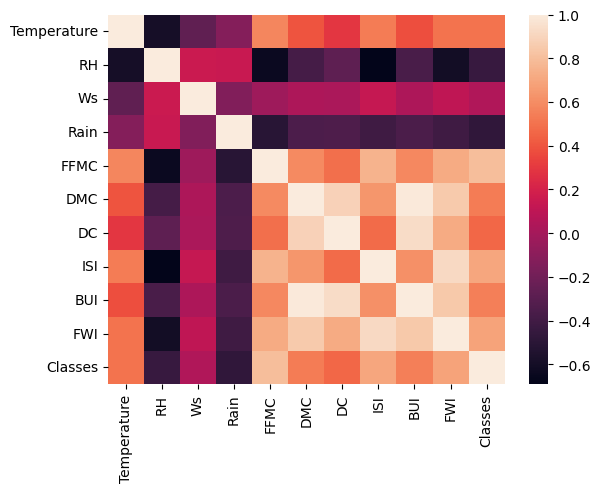

In [ ]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

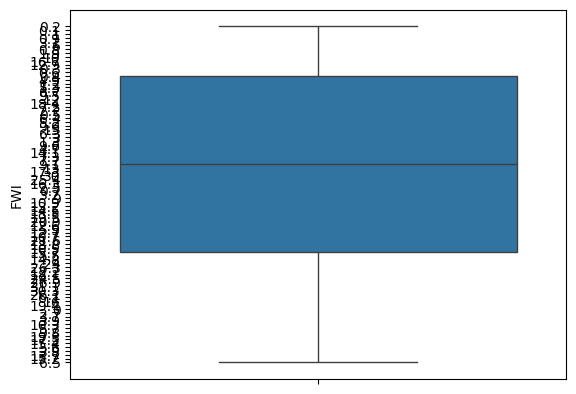

In [ ]:
# to check the outliers using boxplot
sns.boxplot(df_copy['FWI'])

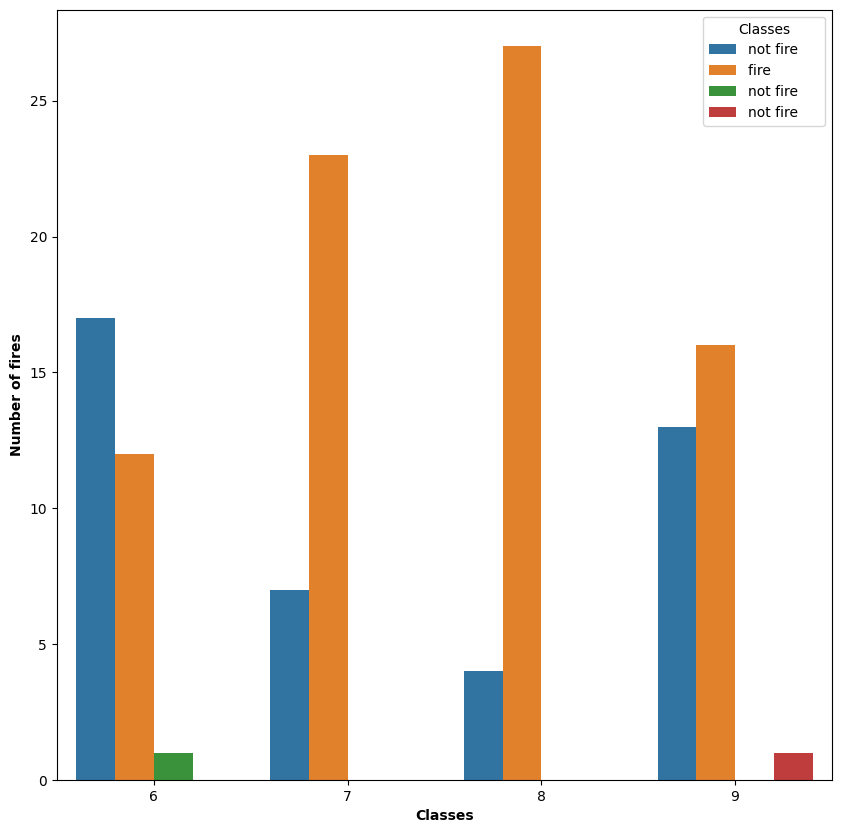

In [ ]:
# checking other factors
dftemp=df
plt.subplots(figsize=(10,10))
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel("Number of fires",weight="bold")
plt.xlabel("Classes",weight="bold")
plt.show()

#model training

In [ ]:
data=pd.read_csv("forest_fire_cleaned.csv")
df=pd.DataFrame(data)

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          121 non-null    int64  
 1   month        121 non-null    int64  
 2   year         121 non-null    int64  
 3   Temperature  121 non-null    int64  
 4   RH           121 non-null    int64  
 5   Ws           121 non-null    int64  
 6   Rain         121 non-null    float64
 7   FFMC         121 non-null    float64
 8   DMC          121 non-null    float64
 9   DC           121 non-null    float64
 10  ISI          121 non-null    float64
 11  BUI          121 non-null    float64
 12  FWI          121 non-null    float64
 13  Classes      121 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.4+ KB


In [ ]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [ ]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [ ]:
df.head()
df['Classes'].value_counts()

,count
Classes,
1,78
0,43


In [ ]:
# choosing dependent and independent features
X=df.drop('FWI',axis=1)
Y=df['FWI']

In [ ]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0


In [ ]:
Y.head()

,FWI
0,0.2
1,0.2
2,0.1
3,1.0
4,0.9


In [ ]:
# train test split of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
X_train.shape

(90, 10)

In [ ]:
X_test.shape

(31, 10)

**FINDING THE CORELATION OF THE DATA**

<Axes: >

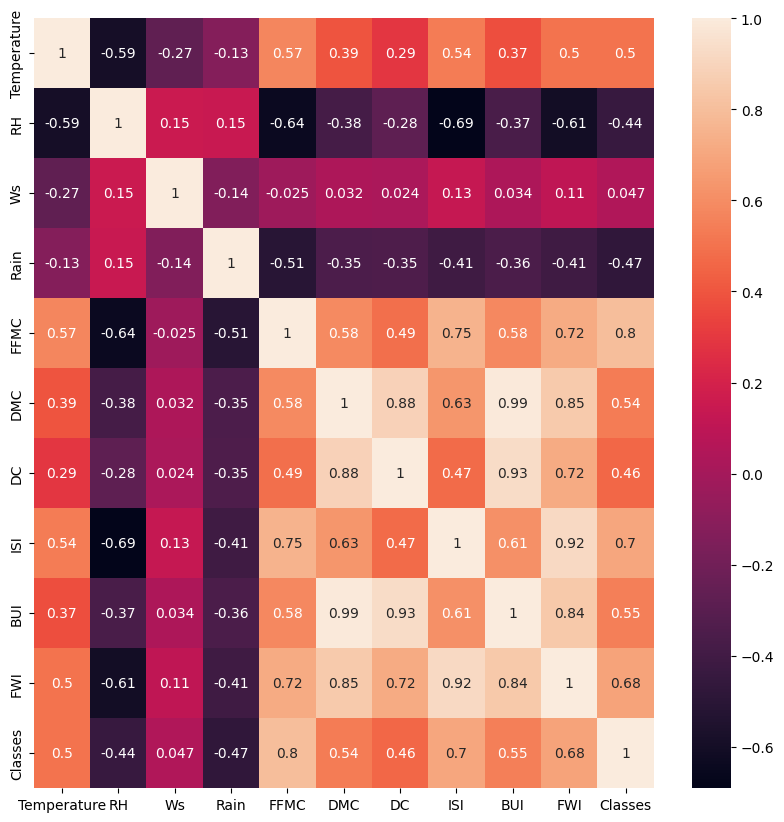

In [ ]:
# checking for multi colinearity
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
# function to seprate the features based on their coreealtion'
def correlation(dataset,threshold):
  col=set()
  corrmat=dataset.corr()
  for i in range(len(corrmat.columns)):
    for j in range(i):
      if abs(corrmat.iloc[i,j])>threshold:
        colname=corrmat.columns[i]
        col.add(colname)
  return col

In [ ]:
## threshold is maily gaiven by the expertise
corr_features=correlation(X_train,0.87)
print(corr_features)

{'DC', 'BUI'}


In [ ]:
# drop the features greater than threshold
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

**Feature scaling and standarisaton**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

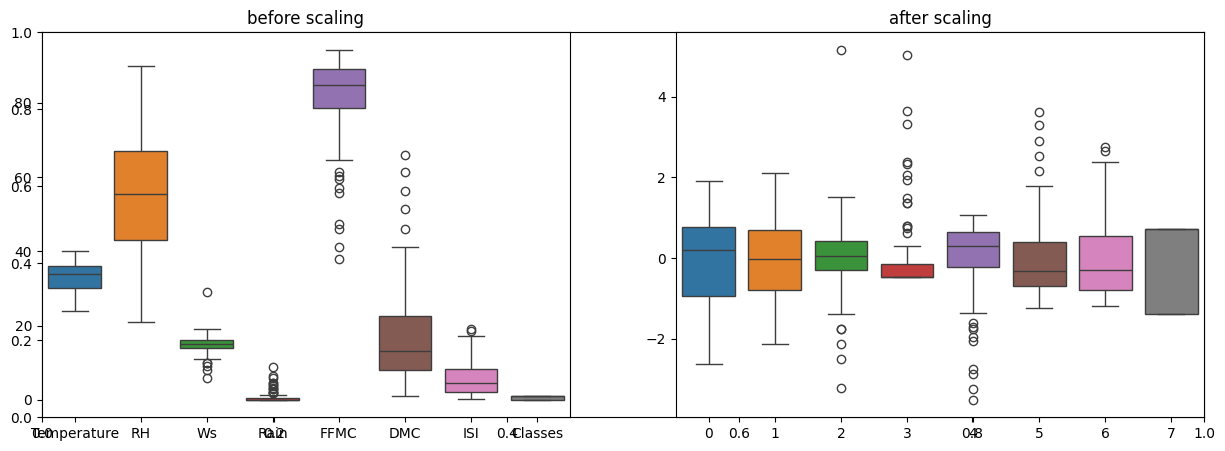

In [ ]:
# box plot to understand the effect of scaling
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('after scaling')
plt.show()

# Linear regression

R2 Score
0.9817955739821155
MAE
0.7943763791044665


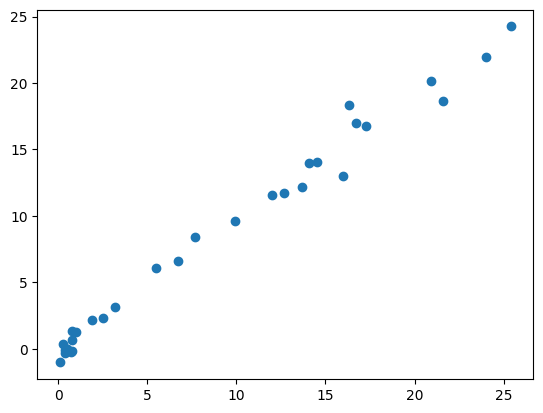

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
lr=LinearRegression()
lr.fit(X_train_scaled,Y_train)
y_pred=lr.predict(X_test_scaled)
print("R2 Score")
print(r2_score(Y_test,y_pred))
print("MAE")
print(mean_absolute_error(Y_test,y_pred))
plt.scatter(Y_test,y_pred)
plt.show()

**Applying lasso regression**

R2 Score
0.957651373729645
MAE
1.261246168854181


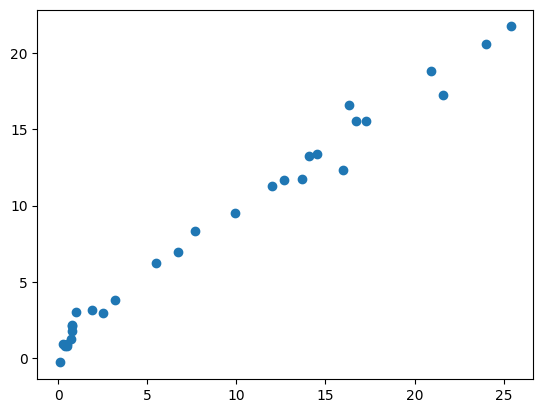

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error
lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
y_pred=lasso.predict(X_test_scaled)
print("R2 Score")
print(r2_score(Y_test,y_pred))
print("MAE")
print(mean_absolute_error(Y_test,y_pred))
plt.scatter(Y_test,y_pred)
plt.show()

**CROSS LASSO VALIDATION**

R2 Score
0.97941334314195
MAE
0.8544722487833695


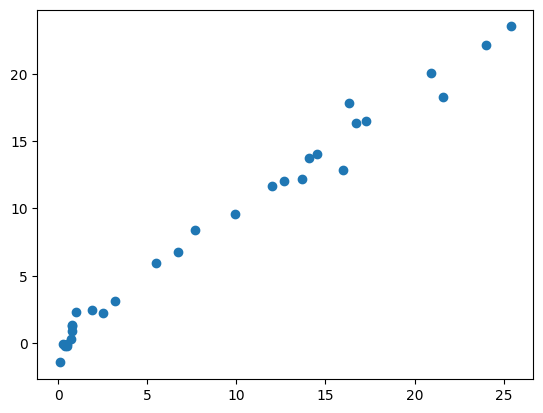

In [ ]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,Y_train)
y_pred=lassocv.predict(X_test_scaled)
print("R2 Score")
print(r2_score(Y_test,y_pred))
print("MAE")
print(mean_absolute_error(Y_test,y_pred))
plt.scatter(Y_test,y_pred)
plt.show()

**Applying Rigged regression**

R2 Score
0.9809018559906207
MAE
0.8114448066477989


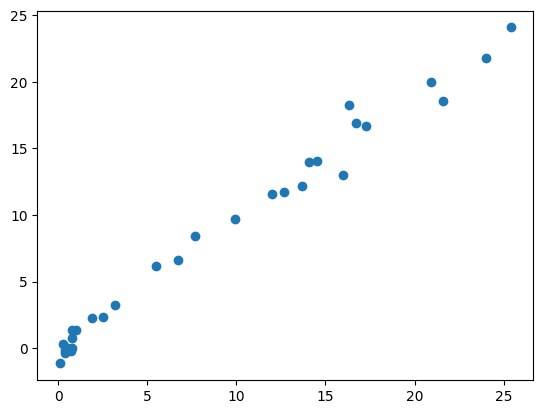

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error
ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
y_pred=ridge.predict(X_test_scaled)
print("R2 Score")
print(r2_score(Y_test,y_pred))
print("MAE")
print(mean_absolute_error(Y_test,y_pred))
plt.scatter(Y_test,y_pred)
plt.show()

**Elastic Net**

R2 Score
0.9020365275430466
MAE
2.014419057830289


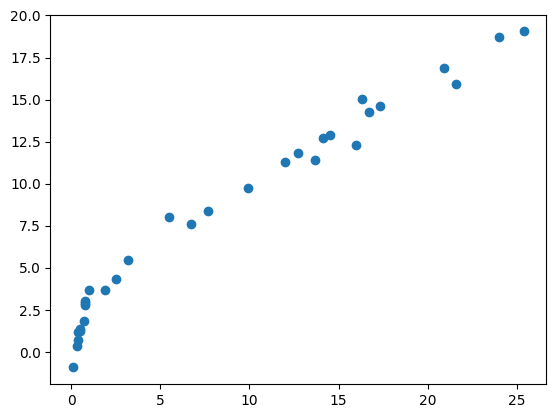

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error
en=ElasticNet()
en.fit(X_train_scaled,Y_train)
y_pred=en.predict(X_test_scaled)
print("R2 Score")
print(r2_score(Y_test,y_pred))
print("MAE")
print(mean_absolute_error(Y_test,y_pred))
plt.scatter(Y_test,y_pred)
plt.show()

we can try different combination like lassocv, rigedcv and elasticnet for good accuracy using cross validation

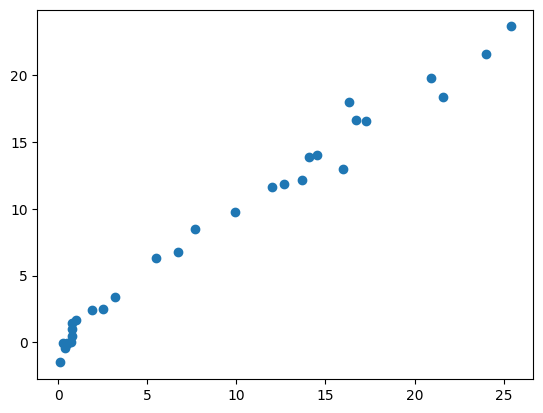

Mean absolute error: 0.8695056885084819
R2 Score: 0.9786429747368117


In [ ]:
# applying elastic net CV
from sklearn.linear_model import ElasticNetCV
encv=ElasticNetCV(cv=5)
encv.fit(X_train_scaled,Y_train)
y_pred=encv.predict(X_test_scaled)
plt.scatter(Y_test,y_pred)
plt.show()
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean absolute error:",mae)
print("R2 Score:",score)

**PICKLING THE BEST MODEL WHICH HAVE THE HIGHEST ACCURACY**

In [ ]:
# pickle the machine Learning model(highest accuracy)
# standard scaler which converts the new test data into standard form


In [ ]:
sc

StandardScaler()

In [ ]:
ridge

Ridge()

In [ ]:
import pickle
# ridge regression
pickle.dump(ridge,open('ridge.pkl','wb'))
# scaler
pickle.dump(sc,open('standard_scaler.pkl','wb'))